In [97]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
func = lambda x: np.sin(10 * np.pi * x)

# 747
M = 140 # Matriculation Number
c = 0.2 + (0.4 * M /1000) # Speed of wave in medium
t1 = np.round(0.1 * (4.2 - (0.7 * M /1000)),4)
t2 = np.round(0.2 * (4.2 - (0.7 * M /1000)),4)
t3 = np.round(0.5 * (4.2 - (0.7 * M /1000)),4)
t4 = np.round(0.9 * (4.2 - (0.7 * M /1000)),4)
t5 = np.round((4.2 - (0.7 * M /1000)),4)

print(M, c, t1, t2, t3, t4,t5)
print("C: ", c)


140 0.256 0.4102 0.8204 2.051 3.6918 4.102
C:  0.256


CFL = 0.1050112
Space array:  [0.    0.001 0.002 ... 0.998 0.999 1.   ]


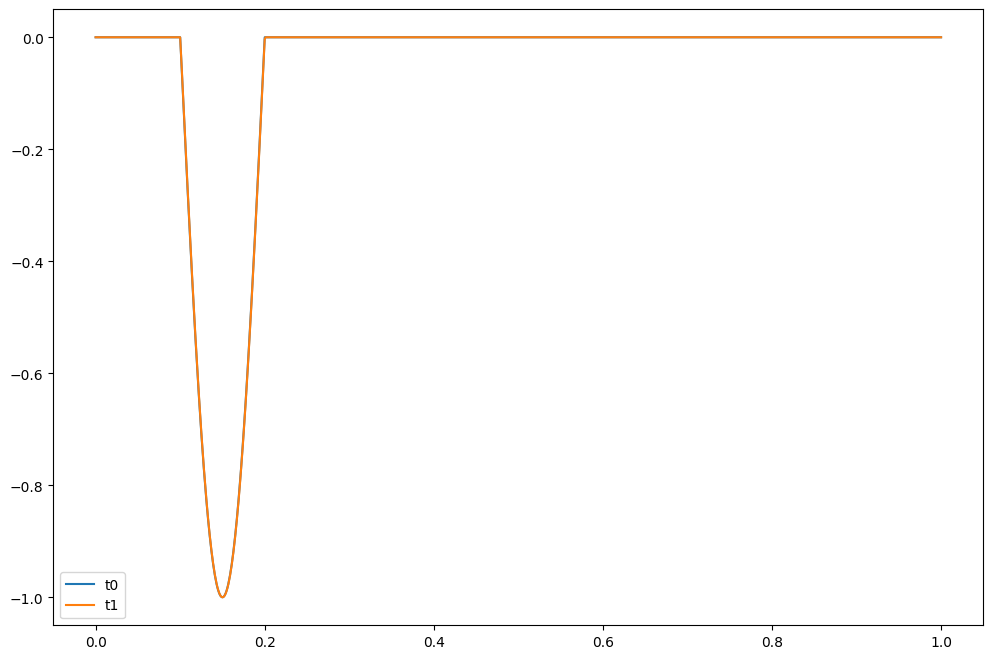

In [ ]:
dx = 0.001# Discretization in space
dt = t1 / 1000 # Discretization on time

CFL = c * dt / dx
print("CFL =", CFL)

# Space Grid
X = np.arange(0, 1 + dx, dx)
# Time Grid
# T = [t1, t2, t3, t4, t5]

print("Space array: ", X)

u0 = np.zeros_like(X)
u0[(X > 0.1) & (X <= 0.2)] = func(X[(X > 0.1) & (X <= 0.2)])

u1 = np.zeros_like(X)
u1[(X > 0.1 + c * dt) & (X <= 0.2 + c * dt)] = func(X[(X > 0.1 + c * dt) & (X <= 0.2 + c * dt)] - c * dt)


In [100]:
T = np.arange(0, 2 * t5, dt)
(T, len(T))

(array([0.0000000e+00, 4.1020000e-04, 8.2040000e-04, ..., 8.2027694e+00,
        8.2031796e+00, 8.2035898e+00], shape=(20000,)),
 20000)

In [101]:
T[100]

np.float64(0.04102)

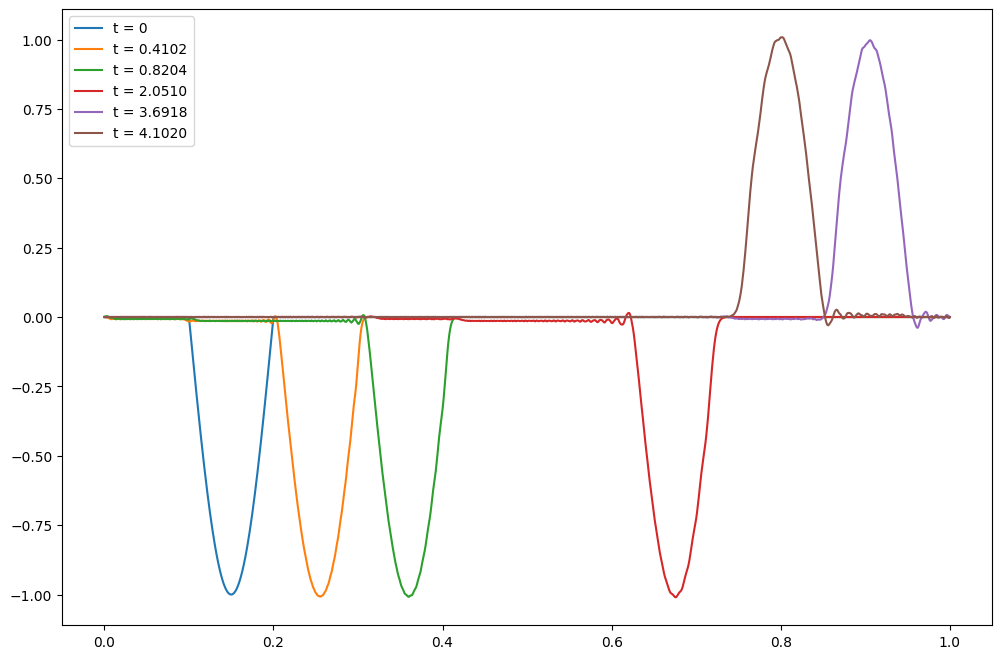

In [ ]:
u_save = []
plt.figure(figsize = (12, 8))
def numerical_solution(u0, u1, X, dx, dt):
  plt.plot(X, u0, label = 't = 0')
  u_back = u0
  u_central = u1
  for w in range(len(T)):
    u_new = np.zeros_like(X)
  # for i in range(len(T)):
    for i in range(len(X)):
      if i == 0 or i == len(X) - 1:
        # Boundary Condition
        u_new[i] = 0
        continue
      u_new[i] = c**2 * (dt**2 / dx**2) * (u_central[i+1] - 2 * u_central[i] + u_central[i-1]) + 2 * u_central[i] - u_back[i]

    if np.round(T[w], 4) in (t1, t2, t3, t4, t5):
      plt.plot(X, u_new, label = f't = {T[w]:.4f}')
    # print(u_new)
    u_save.append(u_new.copy())
    u_back = u_central
    u_central = u_new

  plt.legend()
  plt.show()


numerical_solution(u0, u1, X, dx, dt)
